# 多項分布の多変量正規分布近似とχ²検定の導出

* 黒木玄
* 2024-10-08
$
\newcommand\op{\operatorname}
\newcommand\ds{\displaystyle}
$

See also https://x.com/genkuroki/status/1843653103960371268

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10)

## 方針

多項分布の多変量正規分布近似は多項分布のχ²検定の基礎になる.

$r$ 項分布の多変量正規分布近似は, 
$r$ 項分布が $r$ 個のPoisson分布の直積の条件付き確率分布なので,
$r$ 個のPoisson分布の直積の多変量正規分布近似を最初に求めておくと理解し易い.

$r$ 個のPoisson分布の直積の多変量正規分布近似は,
$1$ 個のPoisson分布の正規分布近似の直積として得られる.

## Poisson分布

期待値 $\lambda > 0$ のPoisson分布 $\op{Poisson}(\lambda)$ の確率質量関数は

$$
P(k|\lambda) = e^{-\lambda}\frac{\lambda^k}{k!} \quad (k=0,1,2,\ldots)
$$

である. 期待値 $\lambda$ のPoisson分布の分散も $\lambda$ であり, 
$\lambda$ を十分に大きくするとPoisson分布は正規分布で近似されるので,

$$
p(k|\lambda) \approx \frac{1}{\sqrt{2\pi\lambda}}\exp\left( -\frac{1}{2}\frac{(k - \lambda)^2}{\lambda} \right).
$$

In [2]:
function plot_poi(; λ=20, kwargs...)
    poi = Poisson(λ)
    normal = Normal(λ, √λ)
    bar(poi; alpha=0.3, label="Poisson($λ)")
    plot!(normal; label="Normal($λ, √$λ)", lw=2)
    plot!(; xlim=(λ-4√λ, λ+4√λ), kwargs...)
end

plot_poi (generic function with 1 method)

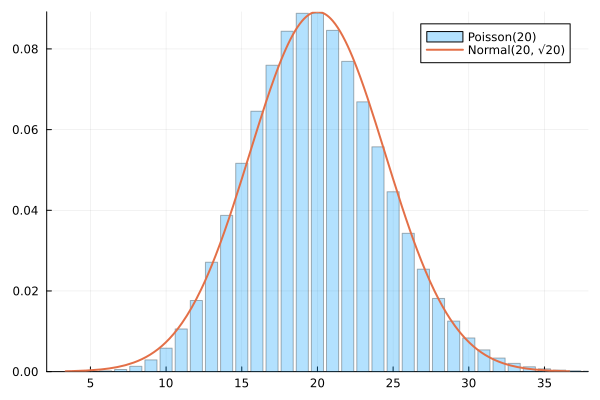

In [3]:
plot_poi(; λ=20)

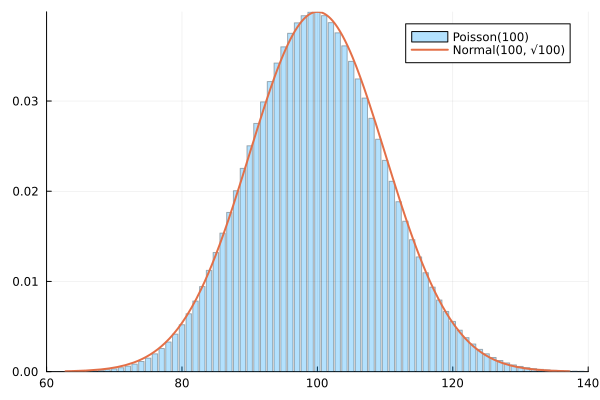

In [4]:
plot_poi(; λ=100)

以下, $\lambda$ は十分に大きいと仮定する.

上で述べたことより, $k \sim \op{Poisson}(\lambda)$ ならば $\dfrac{k-\lambda}{\sqrt{\lambda}}$ は標準正規分布に近似的に従う.

ゆえに, $\dfrac{(k-\lambda)^2}{\lambda}$ は近似的に自由度 $1$ のχ²分布に従う.

## $d$ 変量正規分布と自由度 $d$ のχ²分布の関係

一般に期待値 $(\mu_1,\ldots,\mu_d)$ を持つ $d$ 変量正規分布の確率密度関数は

$$
p(x_1,\ldots,x_d) =
\op{const.} \exp\left(-\frac{1}{2} \sum_{i,j=1}^d b_{ij}(x_i-\mu_i)(x_j-\mu_j)\right),
\quad b_{ij}=b_{ji}\in\mathbb{R}
$$

の形に書ける. このとき, $(x_1,\ldots,x_d)$ がこの形の多変量正規分布に従う確率変数ならば,

$$
\chi^2 = \sum_{i,j=1}^d b_{ij}(x_i-\mu_i)(x_j-\mu_j)
$$

は自由度 $d$ のχ²分布に従うことを, 実対称行列の直交行列による対角化を使って示せる.

## Poisson分布達の直積の多変量正規分布近似

$\lambda_1,\ldots,\lambda_r$ は十分大きいと仮定する.

$k_i \sim \op{Poisson}(\lambda_i)$ であるとし, $k_1,\ldots,k_r$ は独立であるとする.

このとき, $\dfrac{k_i-\lambda_i}{\sqrt{\lambda_i}}$ 達は独立であり,
それぞれ近似的に標準正規分布に従う.

ゆえに, $(k_1,\ldots,k_r)$ は近似的に次の形の確率密度関数を持つ多変量正規分布に近似的に従う:

$$
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - \lambda_i)^2}{\lambda_i} \right).
$$

したがって, Pearsonのχ²統計量 

$$
\chi^2 = \sum_{i=1}^r \dfrac{(k_i - \lambda_i)^2}{\lambda_i}
$$

は自由度 $r$ のχ²分布に近似的に従う.

これで, $r$ 個のPoisson分布の直積から, 自然にPearsonのχ²統計量が出て来ることが分かった.

## Poisson分布達の直積と多項分布の関係

$n$ は正の整数であるとし, $p_i > 0$, $p_1+\cdots+p_r=1$ と仮定し, $\lambda_i=np_i$ とおく.  このとき, Poisson分布達の直積

$$
\prod_{i=1}^r P(k_i|\lambda_i) = \op{const.} \frac{\lambda_1^{k_1}\cdots\lambda_r^{k_r}}{k_1!\cdots k_r!}
\quad (k_i=0,1,2,\ldots)
$$

は条件 $k_1+\cdots+k_r=n$ の下で

$$
\prod_{i=1}^r P(k_i|\lambda_i) =
\op{const.} \frac{p_1^{k_1}\cdots p_r^{k_r}}{k_1!\cdots k_r!} =
\op{const.} \frac{n!}{k_1!\cdots k_r!} {p_1^{k_1}\cdots p_r^{k_r}}
$$

と書き直される. ゆえに, Poisson分布達の直積の条件

$$
k_1+\cdots+k_r=n
$$

による制限で得られた条件付き確率分布は多項分布 $\op{Multinomial}(n, [p_1,\ldots,p_r])$ になる.

## 多項分布の多変量正規分布近似

$n$ は十分大きいと仮定する.

以上で述べたことより, 多項分布 $\op{Multinomial}(n, [p_1,\ldots,p_r])$ は, 

$$
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - \lambda_i)^2}{\lambda_i} \right) =
\op{const.} \exp\left(-\frac{1}{2}\sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i} \right)
$$

という形の確率密度関数を持つ $r$ 変量正規分布を条件

$$
k_1 + \cdots + k_r = n
$$

で制限して得られる条件付き確率分布で近似される. $k_1 + \cdots + k_r = n$ のとき

$$
k_r - n p_r = \sum_{i=1}^{r-1} (k_i - n p_i)
$$

となるので, Pearsonのχ²統計量 $\ds \chi^2 = \sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i}$ は

$$
\chi^2 = \sum_{i,j=1}^{r-1} b_{ij}(k_i- n p_i)(k_j - n p_j)
$$

の形に書き直される. ゆえに, $(k_1,\ldots,k_r) \sim \op{Multinomial}(n, [p_1,\ldots,p_r])$ ならば
Pearsonのχ²統計量

$$
\chi^2 = \sum_{i=1}^r \frac{(k_i - n p_i)^2}{n p_i}
$$

は自由度 $r-1$ のχ²分布に近似的に従う.

### 多項分布とそれを近似する多変量正規分布の同時可視化

In [5]:
function plot_mult(; n=20, p=[0.2, 0.3, 0.5])
    mult = Multinomial(n, p)
    prob = [x+y ≤ n ? pdf(mult, [x, y, n-x-y]) : NaN for x in 0:n, y in 0:n]
    P = heatmap(0:n, 0:n, prob; label="", colorbar=false)
    title!("Multinomial($n, $p)")

    μ = mean(mult)[1:2]
    Σ = cov(mult)[1:2, 1:2]
    mvn = MvNormal(μ, Σ)
    xs = range(0, n, 400)
    ys = range(0, n, 400)
    den = [x+y ≤ n ? pdf(mvn, [x, y]) : NaN for x in xs, y in ys]
    Q = heatmap(xs, ys, den; label="", colorbar=false)
    title!("MvNormal($μ, $(round.(Σ; digits=2)))")

    plot(P, Q; size=(800, 400))
end

plot_mult (generic function with 1 method)

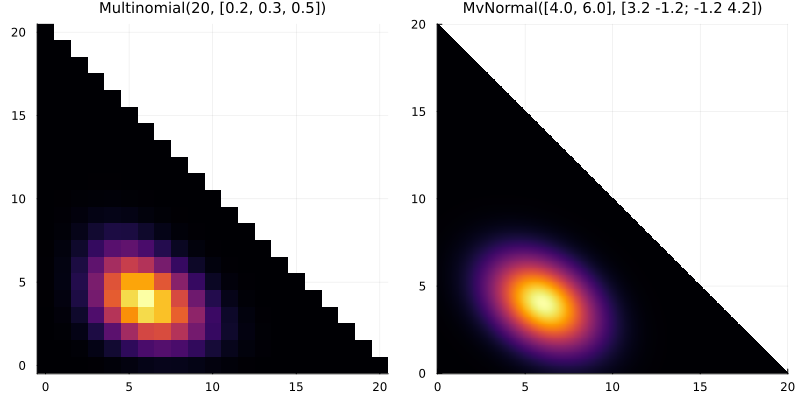

In [6]:
plot_mult(; n=20, p=[0.2, 0.3, 0.5])

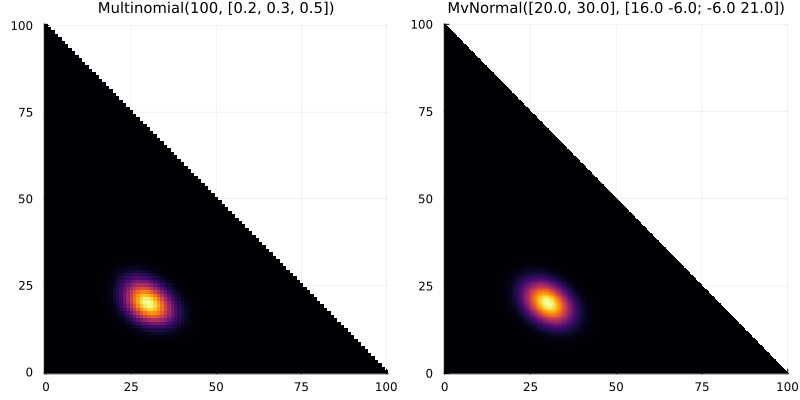

In [7]:
plot_mult(; n=100, p=[0.2, 0.3, 0.5])

### 多項分布のPearsonのχ²統計量の補累積分布関数のグラフ

In [8]:
ecdf_(A, x) = count(≤(x), A) / length(A)
eccdf_(A, x) = count(>(x), A) / length(A)

function chisq_pearson(x, p)
    n = sum(x)
    sum((x - n*p)^2/(n*p) for (x, p) in zip(x, p))
end

function plot_chisq_mult(; n=20, p=[0.2, 0.3, 0.5], L=10^5)
    mult = Multinomial(n, p)
    CP = zeros(L)
    Xtmp = [zeros(Int, length(p)) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(mult, Xtmp[tid])
        CP[i] = chisq_pearson(X, p)
    end
    r = length(p)
    chisq = Chisq(r-1)
    plot(x -> eccdf_(CP, x), -0.001, quantile(chisq, 0.999); norm=true, label="Pearson's χ²")
    plot!(x -> ccdf(chisq, x); label="Chisq($r-1)", ls=:dash)
    plot!(xguide="x", yguide="probability that χ² > x")
    plot!(ytick=0:0.05:1)
    title!("ccdf of Pearson's χ² for\nMultinomial($n, $(round.(p; sigdigits=3)))")
end

plot_chisq_mult (generic function with 1 method)

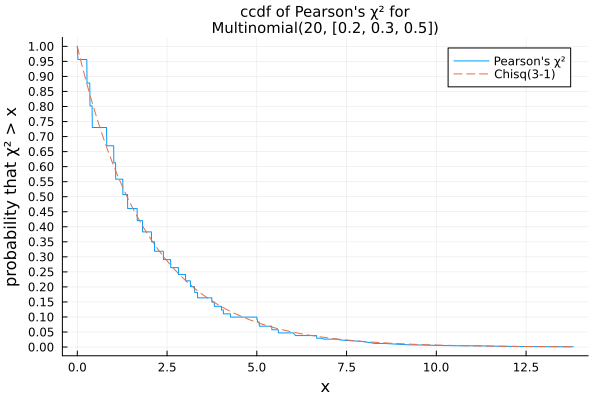

In [9]:
plot_chisq_mult(; n=20, p=[0.2, 0.3, 0.5])

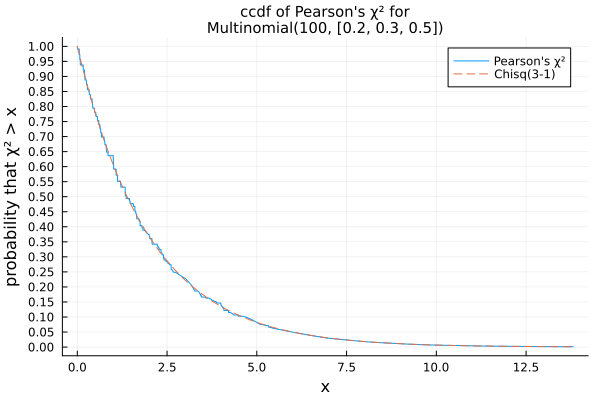

In [10]:
plot_chisq_mult(; n=100, p=[0.2, 0.3, 0.5])

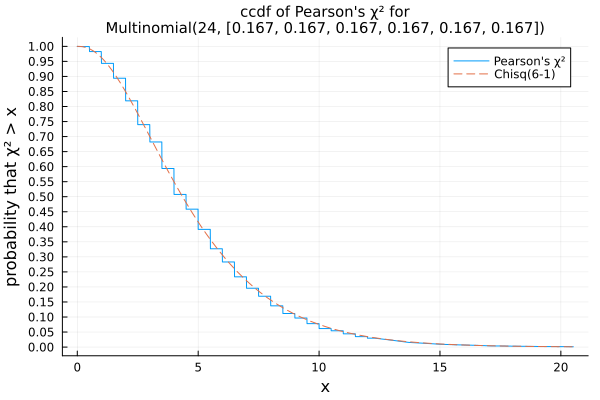

In [11]:
plot_chisq_mult(; n=4*6, p=fill(1/6, 6))

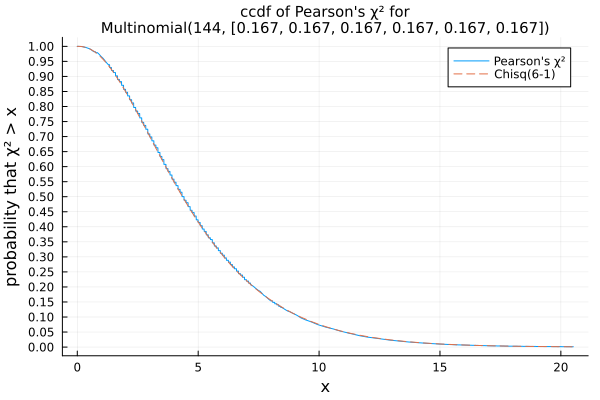

In [12]:
plot_chisq_mult(; n=24*6, p=fill(1/6, 6))

## 「カイ二乗検定は何をやっているのか」のP値による再現

以下は https://note.com/cograph_data/n/n7e330ded4147 より。

<img src="IMG_6532.png" width=80%>

というデータから事後分布

<img src="IMG_6533.png" width=60%>

を作っている(縦軸のスケールがおかしい). これとほぼ同じものをP値関数としても作れることを示そう.

In [13]:
@show chisq_pearson([34, 19, 30, 18, 14, 29], fill(1/6, 6));

chisq_pearson([34, 19, 30, 18, 14, 29], fill(1 / 6, 6)) = 13.416666666666666


In [14]:
function posteriors_bin(data; prior=Beta(1, 1))
    κ, λ = params(prior)
    n = sum(data)
    [Beta(κ+x, λ+n-x) for x in data]
end

safediv(x, y) = x==0 ? zero(x/y) : x/y

function pvalue_bin(k, n, p)
    χ² = safediv((k - n*p)^2, n*p*(1-p))
    ccdf(Chisq(1), χ²)
end

function plot_pp(; data=[34, 19, 30, 18, 14, 29], kwargs...)
    P = plot()
    for (i, dist) in enumerate(posteriors_bin(data))
        plot!(dist, 0, 1; alpha=1, label="$i")
    end
    plot!(xtick=0:0.1:1, ytick=0:20)
    title!("binomial posteriors")

    Q = plot()
    for (i, x) in enumerate(data)
        plot!(p -> pvalue_bin(x, sum(data), p), 0, 1; alpha=1, label="$i")
    end
    plot!(xtick=0:0.1:1, ytick=0:0.05:1)
    title!("binomial P-value functions")

    plot(P, Q; size=(500, 700), layout=(2, 1), kwargs...)
end

plot_pp (generic function with 1 method)

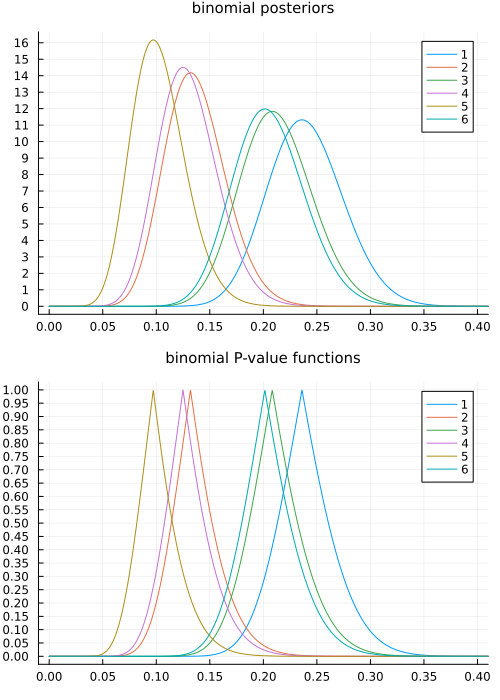

In [15]:
plot_pp(; data=[34, 19, 30, 18, 14, 29], xlim=(-0.01, 0.41), xtick=0:0.05:1)

上の結果の下段がP値関数のグラフである. このように, P値関数は事後分布と同じように使える.